# Tutoriel sur le classificateur bayésien naïf
 
Nous verrons dans ce tutoriel comment détecter des modèles à l’aide du classificateur bayésien naïf, une technique d’apprentissage-machine efficace pour détecter certains modèles et prévoir les dépendances au sein de votre jeu de données.

Nous réexaminerons dans la première partie de ce tutoriel le jeu de données Iris utilisé dans le tutoriel précédent pour apprendre à utiliser le classificateur bayésien naïf. Nous appliquerons par la suite vos nouvelles connaissances pour déceler les pourriels parmi vos messages textes (SMS), de manière à identifier les messages que vous ne désirerez pas lire. Le jeu de données que nous utiliserons pour cela est accessible sur le site https://doi.org/10.24432/C5CC84 [SMS Spam collection]. Il s’agit d’un jeu de données de source libre du Référentiel d’apprentissage-machine UCI. Nous examinerons ensuite la classification multi-étiquettes via le jeu de données CMU que nous avons utilisé antérieurement pour le classificateur des plus proches voisins. Enfin, nous vous donnerons un exemple d’utilisation non aboutie du classificateur bayésien et vous expliquerons pourquoi cela n’a pas fonctionné.


## Les objectifs d’apprentissage

 Durée moyenne d’exécution : 120 minutes
 
À la fin de ce tutoriel, vous devriez être en mesure :  
 * De comprendre ce qu’est un classificateur bayésien naïf.
 * De répartir les données en ensembles d’entrainement et d’essais.
 * De faire des prévisions en fonction du jeu de données.
 * D’évaluer le rendement d’un classificateur.
 * D’utiliser le classificateur bayésien naïf pour déceler les pourriels et classer les livres.
 * D’entrainer un classificateur bayésien naïf de Gauss pour étiquettes uniques ou multiples. 
 * De recourir à l’imputation en établissant une courbe en fonction de données connues d’un classificateur bayésien naïf de Gauss et en utilisant les résultats pour combler les données manquantes.
 

 
## Ce dont vous aurez besoin pour compléter le tutoriel

* Consultez le [document d'introduction](https://uottawa-it-research-teaching.github.io/machinelearning/) pour connaître les exigences générales et le fonctionnement des carnets Jupyter.
* Nous aurons aussi besoin de Pandas pour faciliter la gestion des données. C’est un outil Python très puissant, capable de lire les fichiers CSV et Excel. Il offre aussi d’excellentes capacités de manipulation de données, ce qui est très utile pour l’épuration des données. Nous l’utiliserons avec la trousse JSON de lecture de données.
* Nous utiliserons scikit-learn, SciPy et NumPy aux fins d’apprentissage-machine ainsi que Seaborn et Matplotlib comme outils de traçage.
* Les fichiers de données normalement associées au présent carnet.


## Les meilleures pratiques en termes de gestion des données de recherche (GDR) 

Une bonne manipulation des données destinées à l’apprentissage-machine commence par une gestion efficace des données de recherche (GDR). La qualité de vos données de base aura une incidence sur vos éventuels résultats. Au même titre, la reproductibilité de vos résultats dépendra de vos données de base et de la façon dont vous organiserez vos données pour permettre à d’autres personnes (et aux machines !) de comprendre ces données et de pouvoir les réutiliser.

Nous devrons aussi constamment recourir aux meilleures pratiques de gestion des données de recherche, pratiques recommandées par l'[Alliance de recherche numérique du Canada](https://zenodo.org/records/4000989). Nous vous avons encouragés dans les deux premiers tutoriels à vous conformer à ces meilleures pratiques de gestion des données de recherche :
* ENREGISTREZ VOS DONNÉES BRUTES DANS LEUR FORMAT ORIGINAL
* SAUVEGARDEZ VO DONNÉES (règle du 3-2-1)
* DÉCRIVEZ VOS DONNÉES

Si ces pratiques s’appliquent au présent tutoriel, nous examinerons aussi les meilleures pratiques d’organisation de vos fichiers de données, ce qui permettra d’améliorer la précision de votre modèle d’apprentissage-machine et la réutilisation future de votre jeu de données.

TRAITEMENT DE VOS DONNÉES
* Considérez chaque colonne comme une variable.
* Considérez chaque ligne comme une observation.
* Enregistrez les unités (p. ex., kg ou cm) sous forme de métadonnées (dans leurs colonnes respectives).
* Consignez chaque étape de traitement de vos données dans un fichier README.


Certaines des meilleures pratiques de gestion des données de recherche faciliteront la gestion de votre projet. Elles sont mises en évidence au début de chaque tutoriel de cette série.

## Qu'est-ce qu'un classificateur bayésien naïf?
Un classificateur naïf appartient à la famille des classificateurs basés sur le théorème de Bayes.
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

Cette formule stipule que nous pouvons calculer la probabilité d’un événement à partir de faits qui se sont produits. Au regard de l’apprentissage-machine, cela signifie qu’il est possible de déterminer la probabilité d’attribution d’une étiquette donnée à des données brutes, en fonction des données d’entrée relatives au point de données que nous souhaitons anticiper. En termes d’apprentissage automatique, l’étiquetage des données brutes est une étape préparatoire essentielle pour préciser le contexte des données. L’étiquette attribuée équivaut à une instruction fournie à l’ordinateur pour lui permettre de remettre le point de donnée dans son contexte lors du traitement du jeu de données. L’étiquetage de données étant chronophage, l’utilisation d’un modèle de prévision peut vous sauver du temps.

$$\frac{P(B|A)P(A)}{P(B)}$$ nous aide à prédire à travers l'entraînement du modèle. Le numérateur (au-dessus de la ligne) représente en fait la probabilité de réalisation pour $A$ et $B$. Vous pouvez élargir cette formule pour inclure de nombreux autres événements et ainsi obtenir la probabilité de réalisation pour $A$ en fonction de différentes caractéristiques $B$, $C$, $D$, etc. $P(A|B,C,D,...)$.

Au regard de l’apprentissage-machine, cette formule nous aide à prédire l’attribut de notre jeu de données en fonction des probabilités des caractéristiques (si indépendantes). En termes d’apprentissage-machine et de de reconnaissance de modèles, une caractéristique est une propriété ou un attribut mesurable d’un point de donnée. Les caractéristiques indépendantes (c.-à-d. non modifiées par un autre point de donnée) sont gages de résultats plus précis au niveau de la reconnaissance des modèles.  

Mais qu’arrive-t-il en cas de dépendance entre des points de données ? Prenons à titre d’exemple les données météorologiques du tutoriel sur l’épuration des données et la régression. En présence de données météorologiques, les données relatives à la température agiront sur celles liées aux précipitations (pluie et neige). Le classificateur bayésien naïf performe très bien en présence d’une certaine interdépendance entre les diverses caractéristiques, d’où son qualificatif de **naïf**. 

In [1]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import scipy.optimize

## 1. Utilisation du classificateur bayésien naïf

Le jeu de données de type Iris, décrit dans le tutoriel précédent sur les forêts aléatoires et les arbres décisionnels, fonctionne parfaitement avec le classificateur bayésien naïf. Ce jeu de données décrit des centaines d’espèces végétales de la famille des Iridacées, dont l’identification manuelle et l’étiquetage aux fins d’apprentissage automatique prendraient beaucoup de temps. Nous cherchons donc à générer un modèle pouvant nous aider à prédire quelle étiquette attribuer aux caractéristiques propres à une classe d’iris. Ce jeu de données associe certaines propriétés physiques, notamment la longueur des pétales, à ce type d’iris.

Ce jeu de données respecte aussi les meilleures pratiques de gestion des données de recherche en nommant clairement les variables de chaque colonne. De plus, chaque ligne réfère à une seule et unique observation sous forme de point de donnée. Le sépale et le pétale sont deux composantes distinctes de l’iris. Grâce à la structure de ce jeu de données, un modèle informatique peut facilement intégrer comme points de données dépendants la longueur et la largeur des sépales et des pétales (la longueur ayant une incidence sur la largeur). Mais le modèle informatique ne dispose pas de connaissances horticoles contextuelles pour étiqueter les caractéristiques de l’espèce. Nous devons donc lui enseigner comment prédire l’espèce selon les probabilités que celle-ci présente de telles caractéristiques.

Vous découvrirez dans cette section le nombre minimal d’étapes nécessaires pour utiliser le classificateur bayésien naïf. Nous approfondirons la question dans les sections ultérieures. 

Peu importe le jeu de données, la première étape consiste bien évidemment à charger les données. Le jeu de données Iris étant couramment utilisé dans les tutoriels d’apprentissage automatique, il est inclus dans certaines bibliothèques, dont celle de Seaborn que nous utiliserons.  Deux colonnes nous intéressent : « data (données) » et « target (cible) ». La première contient nos caractéristiques, c.-à-d. les données d’entrée de notre algorithme d’apprentissage-machine stockées sous la variable x. Il s’agit de la longueur des pétales, de la longueur des sépales, etc. La deuxième colonne représente la sortie de notre algorithme d’apprentissage-machine. Ce sont les étiquettes que nous tentons de prédire et que nous stockerons sous la variable y. C’est en fait les noms des fleurs qui seront listées dans `iris.target_names`.

In [2]:
iris = datasets.load_iris()
X = iris['data']  # features
y = iris['target']  # labels
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

En exécutant le code ci-dessous, nous répartirons nos données en jeux d’entrainement et en jeu d’essais, une étape quasi indispensable à tout algorithme d’apprentissage-machine car elle permet d’écarter certaines données qui ne seront pas utilisées aux fins de cet apprentissage. Vous pourrez les utiliser ultérieurement pour qualifier le degré de d’exactitude du modèle entrainé en l’alimentant de données pour comparer les résultats anticipés aux résultats que vous savez valides. 

In [3]:
# Répartir les données en jeux de données d’entrainement et d’essais
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Le classificateur bayésien naïf le plus répandu est de type gaussien. Celui-ci considère que les données d’entrée sont réparties normalement, c.-à-d. qu’il adopte une répartition gaussienne, ce qui est très souvent le cas.  Certains sont davantage axés sur d’autres modes de répartition mais nous nous limiterons ici au modèle gaussien.

Nous devons tout d’abord générer le modèle en utilisant la fonction `GaussianNB()`. Nous pouvons alors utiliser la fonction d’adaptation `fit` du modèle à l’aide des données (l’entraîner).

Une petite remarque : vous rencontrerez dans les carnets Jupyter des énoncés suggérant de faire confiance au carnet. Cela veut simplement dire que vous devrez exécuter vous-même le code pour connaitre les résultats. C’est tout simplement une mesure de sécurité inhérente à Jupyter.

In [4]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Le premier entrainement du modèle étant maintenant complété, nous pouvons l’utiliser pour prévoir des étiquettes. Nous utiliserons pour cela le jeu de données mis de côté précédemment. En effet, le modèle n’a pas encore été entrainé par par rapport à la variable `X_test`.

In [5]:
y_pred = gnb.predict(X_test)

Les prédictions faites par le modèle peuvent maintenant être comparées aux étiquettes actuelles. Cela nous permet d’évaluer la performance du modèle en fonction de données qu’il n’a encore jamais rencontrées. 

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Donc 100 % d’exactitude. Les étiquettes prévues correspondent parfaitement aux étiquettes actuelles. Dans les faits, une précision de 100 % est fortement suspecte car trop proche de la perfection. Cette perfection est toutefois la raison pour laquelle le jeu de données Iris se retrouve dans tant de tutoriels.

Le temps est venu de passer à quelque chose d’un peu plus difficile.  Nous utiliserons une base de données de messages textes pour déterminer si ces messages sont ou non des pourriels.

## 2. Le classificateur bayésien naïf pour prédire les pourriels

La détection de pourriels est une des applications courantes du classificateur bayésien naïf. C’est une méthode très rapide et efficace, les pourriels représentant près de 50 % de tous les courriels envoyés ! Envoyer des messages textes coûtant de l’argent, le taux est plus bas pour les pourriels. Quoiqu’il en soit, les pourriels sont vraiment énervants !

Une façon de filtrer les pourriels consiste à entrainer le modèle à reconnaitre les termes fréquemment utilisés par les polluposteurs, mots qui se distinguent suffisamment de ceux employés couramment dans les vrais messages. Nous utilisons pour cela la [SMS Spam collection] https://doi.org/10.24432/C5CC84collection, un jeu de données de source libre du Référentiel d’apprentissage-machine UCI.

Ce jeu de données étant conforme aux meilleures pratiques de gestion des données de recherche, nous savons que les données proviennent de sources multiples, notamment par extraction manuelle de pourriels affichés sur un forum Internet de plaintes, un procédé exigeant. Nous comprenons aussi la structure des données présentes dans cette documentation, basée sur un jeu de mots au niveau de l’appellation de l’appellation « spam » ou « ham » de la variable. Ce jeu de mots, qui établit une distinction entre le jambon (ham) et le SPAM, un produit commercial hautement traité à base de jambon, considéré de moindre qualité et d’origine douteuse, sera probablement davantage apprécié des anglophones.

Ce jeu de données est inclus dans le référentiel ci-après et devrait donc apparaitre dans le sous-répertoire des données. Utilisons maintenant Pandas pour lire ces données saisies sous forme de valeurs séparées par tabulation. Nous devons indiquer que nous utiliserons le caractère de tabulation encodé `\t`. Ce fichier ne comportant aucun en-tête, nous générerons nos propres noms de colonnes.

In [7]:
textmessages = pd.read_csv('MLTS_20240530_NB_data_1.0/MLTS_20240530_NB_SMSSpamCollection_1.0.tsv', sep='\t', header=None, names=['spam_or_ham','text'])
textmessages.head(10)

,spam_or_ham,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


Nous souhaitons examiner la fréquence des mots. Les messages qui contiennent de nombreux « mauvais » mots risquent davantage d’être des pourriels, tandis que ceux qui comportent beaucoup de « bons » mots seront probablement de vrais messages ou du vrai « jambon ». Il nous faut donc étiqueter ces mots pour entrainer l’ordinateur en fonction d’un jugement de valeur « bon » ou « mauvais » avant de lui demander de compter les mots et de les définir en tant que « spam » ou « ham ». Fort heureusement, l’application scikit-learn comporte un extracteur appelé `CountVectorizer` qui permet de le faire.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

Utilisons maintenant tous les mots contenus dans les messages pour constituer un dictionnaire. Nous dénombrerons ensuite les occurrences de chaque mot dans un message donné.

In [9]:
count_vect = CountVectorizer()
X = count_vect.fit_transform(textmessages.text)

In [10]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 74169 stored elements and shape (5572, 8713)>

Il y a 74 169 mots distincts dans le jeu de données intégral. Chaque mot est associé à une fréquence qui servira de donnée d’entrée à notre modèle. Cela représente une quantité impressionnante de caractéristiques ! Heureusement, la capacité de traiter un grand nombre de caractéristiques est un des points forts du classificateur bayésien naïf. Il ne s’agit pas ici seulement de « bons » ou « mauvais » mots mais bien de leurs combinaisons potentielles.

Nous avons uniquement besoin des étiquettes « spam » ou « ham ». Nous devons alors diviser le jeu de données d’entrainement et fournir ces données au modèle pour son apprentissage.

In [11]:
y = textmessages['spam_or_ham']

In [12]:
# Répartir les données en jeux de données d’entrainement et d’essais
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2, random_state=42)

In [13]:
# Entrainer un classificateur bayésien naïf de type gaussien
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Nous disposons maintenant d’un modèle entrainé qui peut traiter n’importe quel message et l’étiqueter en tant que pourriel ou vrai message. Examinons maintenant son degré de précision. 

In [14]:
# Faire des prédictions pour le jeu de données d’essais
y_pred = gnb.predict(X_test)

In [15]:
# Évaluer la performance du classificateur
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9067264573991032


Près de 90 % ce qui est très acceptable. Si c’est un pourcentage prévisionnel acceptable, nous avons besoin de plus d’informations pour l’évaluer. Puisqu’il s’agit d’un filtre de pourriels, les faux positifs (messages faussement étiquetés comme pourriels) sont potentiellement plus dommageables que les faux négatifs (messages faussement étiquetés comme vrais).

Nous devons alors recourir à une grille de correction qui nous dira combien de pourriels ont été correctement classés plutôt que combien de vrais messages.

In [16]:
confusion_matrix(y_test, y_pred)

array([[873,  93],
       [ 11, 138]])

Nous pouvons en faire le tracé pour mieux comprendre. 

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

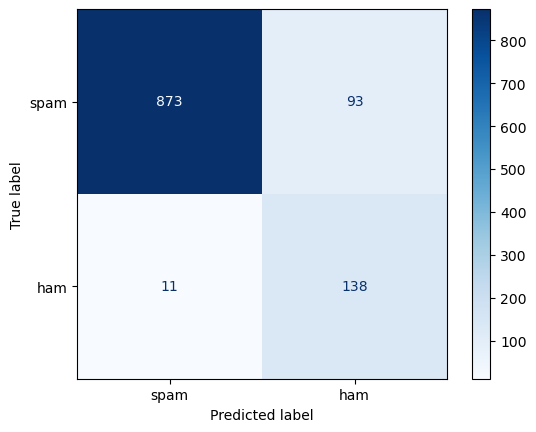

In [18]:
ConfusionMatrixDisplay.from_estimator(
        gnb,
        X_test,
        y_test,
        display_labels=["spam","ham"],
        cmap=plt.cm.Blues,
#        normalize=normalize,
    )

Nous constatons que 11 vrais messages ont été définis comme pourriels. C’est le genre de chiffre que nous cherchons, c’est-à-dire le plus près possible de zéro car si un tel filtre est utilisé pour supprimer automatiquement des messages considérés comme des pourriels, des vrais messages seront aussi perdus ce qui est bien pire que de supprimer manuellement quelques rares pourriels qui n’auront pas été décelés.

Nous avons donc entrainé un classificateur bayésien naïf à prédire une seule et unique étiquette. Compliquons maintenant les choses en l’entrainant à prédire plusieurs étiquettes.

## 3. Genre des livres

Nous chercherons dans cette section à créer un modèle capable de déterminer le genre auquel un livre appartient en fonction de son résumé. Un livre peut cependant appartenir à plusieurs genres, ce qui diffère complétement du jeu de données Iris utilisé précédemment, dans lequel chaque point de donnée ne peut être associé qu’à une seule et unique étiquette.  

### Données
Nous utiliserons le jeu de données sur les résumés de livres du CMU, disponible au https://www.cs.cmu.edu/~dbamman/booksummaries.html. Vous n’avez pas à le télécharger puisqu’il est déjà intégré au sous-répertoire de données inclus dans le présent carnet.

Ce jeu de données, séparées par tabulation et sans ligne de titre, est semblable au jeu de données sur les messages SMS que nous avons utilisé précédemment.  Nous pouvons obtenir les titres de colonnes via le fichier README en suivant le lien ci-dessus. 

In [19]:
books = pd.read_csv('MLTS_20240530_NB_data_1.0/MLTS_20240530_NB_booksummaries_1.0.txt', sep="\t", header=0, names=['wikipedia', 'freebase', 'title', 'author', 'publicationdate', 'genres', 'summary'])

Ce jeu de données présente un certain nombre de valeurs manquantes. Bien que nous puissions tenter d’améliorer ce jeu de données, nous nous contenterons par simple paresse d’éliminer les lignes comportant des valeurs manquantes. Nous utiliserons ensuite la fonction `head()` pour afficher les dix premières lignes du jeu de données et voir à quoi elles ressemblent.

In [20]:
books = books.dropna()
books.head()

,wikipedia,freebase,title,author,publicationdate,genres,summary
0,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
1,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...","The book tells the story of Paul Bäumer, a Ge..."
5,2890,/m/011zx,A Wizard of Earthsea,Ursula K. Le Guin,1968,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...","Ged is a young boy on Gont, one of the larger..."
7,4081,/m/01b4w,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...","Living on Mars, Deckard is acting as a consul..."


Les genres étant indiqués sous format JSON, nous devons utiliser la trousse JSON pour les extraire.

In [21]:
import json

Nous devons ensuite convertir les données JSON en une simple liste. Nous pouvons ignorer les identifiants étranges.

In [22]:
def genre(row):
    g = json.loads(row.genres)
    return list(g.values())

genresperbook = books.apply(genre, axis=1)
books = books.assign(genres=genresperbook)

Nous utiliserons à nouveau la fonction `head()` pour afficher les dix première lignes du jeu de données sur les résumés de livres. Il y a maintenant une nouvelle colonne intitulée « genres » dans laquelle sont énumérés les différents genres.

In [23]:
books.head()

,wikipedia,freebase,title,author,publicationdate,genres,summary
0,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan..."
1,986,/m/0ldx,The Plague,Albert Camus,1947,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...
4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"[War novel, Roman à clef]","The book tells the story of Paul Bäumer, a Ge..."
5,2890,/m/011zx,A Wizard of Earthsea,Ursula K. Le Guin,1968,"[Children's literature, Fantasy, Speculative f...","Ged is a young boy on Gont, one of the larger..."
7,4081,/m/01b4w,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"[Science Fiction, Speculative fiction]","Living on Mars, Deckard is acting as a consul..."


### 3.1 Extraction des caractéristiques
Nous souhaitons maintenant prédire plusieurs étiquettes. Nous pouvons notamment le faire en créant une colonne fictive, c’est-à-dire une nouvelle colonne pour chaque étiquette dont la valeur sera 0 lorsque le livre n’appartient pas à ce genre et de 1 si le livre est bel et bien de ce genre. Vous obtenez ainsi des caractéristiques indépendantes prévisibles.

Le code ci-après permet de le faire. Il ne s’agit pas de magie noire et, en toute transparence, je l’ai copié de StackOverflow. Il convertit essentiellement les listes de la colonne de genres en une série Pandas. Puis il les superpose l’une sur l’autre en conservant l’index principal mais en introduisant un sous-index pour chaque genre et chaque livre. Nous obtenons ensuite les colonnes fictives. Le résultat demeure une trame de données multi-index comportant une colonne pour chaque genre associé au genre cité pour un livre donné.

Nous devons maintenant ramener cela à une trame de données à un seul index. Pour ce faire, nous regroupons tout cela sous le premier index de notre trame multi-index, soit l’index des livres. Nous en faisons ensuite la somme, obtenant ainsi une seule ligne par livre dont la valeur sera 1 si ce livre appartient à un genre spécifique et 0 en cas contraire. Nous ajoutons par la suite un préfixe au nom de la colonne.

In [24]:
dummies = books.genres.apply(pd.Series).stack().str.get_dummies().groupby(level=0).sum().add_prefix('genre_')
books = books.join(dummies)

In [25]:
books

,wikipedia,freebase,title,author,publicationdate,genres,summary,genre_Absurdist fiction,genre_Adventure,genre_Adventure novel,...,genre_Utopian fiction,genre_Vampire fiction,genre_War novel,genre_Western,genre_Western fiction,genre_Whodunit,genre_Wuxia,genre_Young adult literature,genre_Zombie,genre_Zombies in popular culture
0,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,986,/m/0ldx,The Plague,Albert Camus,1947,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"[War novel, Roman à clef]","The book tells the story of Paul Bäumer, a Ge...",0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,2890,/m/011zx,A Wizard of Earthsea,Ursula K. Le Guin,1968,"[Children's literature, Fantasy, Speculative f...","Ged is a young boy on Gont, one of the larger...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4081,/m/01b4w,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"[Science Fiction, Speculative fiction]","Living on Mars, Deckard is acting as a consul...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16548,36372465,/m/02vqwsp,The Third Lynx,Timothy Zahn,2007,[Science Fiction],The story starts with former government agent...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16550,36534061,/m/072y44,Remote Control,Andy McNab,1997,"[Thriller, Fiction, Suspense]",The series follows the character of Nick Ston...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16554,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"[Thriller, Fiction]",The reader first meets Rapp while he is doing...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16555,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,[Autobiography],The book follows very rough chronological ord...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ouf !! Les données sont maintenant de format utilisable pour les étiquettes.

Examinons un peu plus en détail les genres et plus particulièrement le nombre de livres dans chaque catégorie. Nous calculerons simplement le total des colonnes fictives de genres. 

In [26]:
genreusage = books.drop(['wikipedia', 'freebase', 'author', 'publicationdate', 'genres', 'title', 'summary'], axis=1).sum().sort_values(ascending=False)
genreusage

genre_Fiction                3674
genre_Speculative fiction    3270
genre_Novel                  2088
genre_Science Fiction        2001
genre_Fantasy                1863
                             ... 
genre_Prose poetry              1
genre_Robinsonade               1
genre_Superhero fiction         1
genre_Utopian fiction           1
genre_Treatise                  1
Length: 215, dtype: int64

On retrouve parmi le jeu de données plusieurs genres associés à un seul livre. Vous comprendrez que cela n’est pas trop efficace du point de vue de l’entrainement du modèle. Introduisons donc une limite aléatoire de 200. Combien de genres reste-t-il ?

In [27]:
genreusage = genreusage.reset_index().rename(columns={0: "count"})
genreusage = genreusage[genreusage["count"] > 200]
genreusage

,index,count
0,genre_Fiction,3674
1,genre_Speculative fiction,3270
2,genre_Novel,2088
3,genre_Science Fiction,2001
4,genre_Fantasy,1863
5,genre_Children's literature,1627
6,genre_Mystery,973
7,genre_Young adult literature,625
8,genre_Crime Fiction,557
9,genre_Historical novel,551


On se retrouve avec 16 genres. Je crois qu’il est possible d’entraîner notre modèle à les reconnaitre. Supprimons maintenant les décomptes pour ne travailler qu’avec une liste de genres. Nous pourrons alors utiliser la liste pour sélectionner uniquement les colonnes fictives concernées et ignorer les autres. 

In [28]:
genretrainlist = list(genreusage["index"])
genretrainlist

['genre_Fiction',
 'genre_Speculative fiction',
 'genre_Novel',
 'genre_Science Fiction',
 'genre_Fantasy',
 "genre_Children's literature",
 'genre_Mystery',
 'genre_Young adult literature',
 'genre_Crime Fiction',
 'genre_Historical novel',
 'genre_Suspense',
 'genre_Thriller',
 'genre_Horror',
 'genre_Romance novel',
 'genre_Historical fiction',
 'genre_Adventure novel']

In [29]:
dummies = dummies[genretrainlist]

### 3.2 Les données d’entrée
Il s’agit des résumés de livres, donc essentiellement une collection de mots. Il est possible de les vectoriser en créant un vecteur dont la longueur équivaut au nombre de mots distincts dans tous les résumés combinés. Chaque résumé de livre pourra alors être représenté par un vecteur qui dénombre le compte de mots.  

Si cela semble une tâche complexe, sachez que scikit-learn peut le faire pour nous comme il l’a fait précédemment pour les messages SMS.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [31]:
count_vect = CountVectorizer()

In [32]:
X = count_vect.fit_transform(books.summary)

Examinons maintenant le tout premier résumé de livre transformé.

In [33]:
X[0]

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 486 stored elements and shape (1, 90759)>

Le résumé contient 486 mots par rapport au dictionnaire de 90 759 mots.
à
Les modèles d’apprentissage automatique aiment que toutes choses soient inclue entre 0 et 1 car cela facilite la comparaison des caractéristiques et tout est ramenée à une échelle similaire. Par ailleurs, réduire un peu plus le nombre de mots utilisé couramment facilitera aussi le processus car les mots apparaissant dans tous les résumés n’auront plus d’incidence sur la classification. Nous pouvons modifier la fréquence des mots normalisés via la fonction `TfidfTransformer`. L’acronyme anglais « TFIDF » signifie « Term-Frequency times Inverse Document-Frequency » c’est-à-dire la fréquence de terme – fréquence de document inversé en français. La fréquence de document inversé s’occupe de la diminution du nombre de mots utilisés fréquemment.

In [34]:
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X)

### Entraînement

Le format de nos données nous permettant maintenant d’alimenter le modèle, nous pouvons commencer l’entrainement. Souvenons-nous des genres ciblés pour la formation. Il s’agit des colonnes fictives de notre jeu de données.

In [35]:
dummies.columns

Index(['genre_Fiction', 'genre_Speculative fiction', 'genre_Novel',
       'genre_Science Fiction', 'genre_Fantasy', 'genre_Children's literature',
       'genre_Mystery', 'genre_Young adult literature', 'genre_Crime Fiction',
       'genre_Historical novel', 'genre_Suspense', 'genre_Thriller',
       'genre_Horror', 'genre_Romance novel', 'genre_Historical fiction',
       'genre_Adventure novel'],
      dtype='object')

Nous pouvons entrainer le modèle pour chacun de ces genres. De fait, nous avons un modèle pour chaque genre. Nous utilisons une boucle `for` autour des genres pour obtenir un modèle qui indique si le livre appartient ou non au genre concerné.

Sachez que ce processus requiert beaucoup d’espace mémoire. La fonction `X.toarray()` ci-après nécessite beaucoup de mémoire pour développer les données sous format `GuassianNB` exploitable. Le code ci-dessous plantera en l’absence de suffisamment de mémoire. Assurez-vous de sélectionner une valeur appropriée pour le maximum de livres (`maxbooks`). Une valeur plus faible réduira la quantité de mémoire utilisée mais réduira aussi le nombre de livres utilisés pour l’entrainement du modèle, rendant ce dernier moins précis.

In [36]:
for col in dummies.columns:

    # Combien de livres sont nécessaires pour l’entrainement 
    maxbooks = 10000    # Utiliser ce nombre si votre ordinateur dispose de plus de 32 GB de mémoire
    #maxbooks = 4000    # Utiliser ce nombre si votre ordinateur dispose de 16 GB
    #maxbooks = 2000    # Utiliser ce nombre si votre ordinateur dispose de 8 GB

    # Répartir les données en jeux de données d’entrainement et d’essais
    y = dummies[col][:maxbooks]
    X_train, X_test, y_train, y_test = train_test_split(X.toarray()[:maxbooks], y, test_size=0.2, random_state=42)

    # Entrainer un classificateur bayésien naïf de type gaussien
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    # Faire des prédictions pour le jeu de données d’essais
    y_pred = gnb.predict(X_test)
    
    # Évaluer la performance du classificateur
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {col}: {accuracy}")

Accuracy for genre_Fiction: 0.5739644970414202
Accuracy for genre_Speculative fiction: 0.6847767616998386
Accuracy for genre_Novel: 0.7294244217321141
Accuracy for genre_Science Fiction: 0.7998924152770307
Accuracy for genre_Fantasy: 0.8579881656804734
Accuracy for genre_Children's literature: 0.8235610543302851
Accuracy for genre_Mystery: 0.8864981172673481
Accuracy for genre_Young adult literature: 0.9268423883808499
Accuracy for genre_Crime Fiction: 0.933835395373857
Accuracy for genre_Historical novel: 0.9381387842926304
Accuracy for genre_Suspense: 0.9268423883808499
Accuracy for genre_Thriller: 0.9526627218934911
Accuracy for genre_Horror: 0.9558902635825712
Accuracy for genre_Romance novel: 0.958041958041958
Accuracy for genre_Historical fiction: 0.9558902635825712
Accuracy for genre_Adventure novel: 0.9714900484131254


Il semblerait que nous puissions prédire les genres assez bien, surtout en comparaison des « plus proches voisins » que nous avons tentés d’utiliser précédemment. Le genre « fiction » semble toutefois difficile à prédire. Cela est sans doute imputable au caractère trop générique de cette étiquette, d’autant que bon nombre de genres peuvent être classés comme appartenant à la catégorie fiction.

La différence entre le classificateur bayésien naïf et celui des plus proches voisins réside dans le fait que le classificateur bayésien gère particulièrement bien d’énormes quantités de colonnes de données d’entrées, tandis que la méthode des proches voisins se plante. C’est là un exemple parfait de l’importance de bien choisir le type de modèle.


## 4. Résultats scolaires

L’Ontario produit un jeu de données regroupant des statistiques sur les établissements scolaires que nous pouvons télécharger à partir de leur catalogue. N’oubliez pas qu’il s’agit ici d’un exemple d’**ÉCHEC**. Nous procéderons étape par étape et en apprendrons un peu plus sur l’imputation. Nous discuterons à la fin des motifs possibles de cet échec.  

### 4.1 Nettoyage des données

Le jeu de données issu du [Ontario Data Catalogue](https://data.ontario.ca/dataset/school-information-and-student-demographics/resource/e0e90bd5-d662-401a-a6d2-60d69ac89d14) comporte des données démographiques sur toutes les écoles ontariennes. Ce jeu de données prend la forme d’un tableur Excel que Pandas pourra lire.

Dans ce jeu de données, les données manquantes sont indiquées par « NA » Mais vous trouverez aussi « SP » qui correspond à un taux d’inscription trop faible pour consigner des données sur la performance des étudiantes et étudiants susceptibles de soulever des problèmes de confidentialité. Nous aviserons Pandas de considérer « SP » et « NA » comme des données manquantes. Vous trouverez aussi « N/D » et « N/R » qui sont en fait des cas spéciaux de « NA » qui seront aussi traités comme des données manquantes. 


In [37]:
schools = pd.read_excel('MLTS_20240530_NB_data_1.0/MLTS_20240530_NB_school_demographics_1.0.xlsx', na_values=["NA","SP", "N/D", "N/R"])

Voyons maintenant quelle est la qualité des données.

In [38]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4904 entries, 0 to 4903
Data columns (total 49 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Board Number                                                                      4904 non-null   object 
 1   Board Name                                                                        4904 non-null   object 
 2   Board Type                                                                        4904 non-null   object 
 3   School Number                                                                     4904 non-null   object 
 4   School Name                                                                       4904 non-null   object 
 5   School Type                                                                       4904 non-null   object 
 6   

Plusieurs colonnes semblent ne contenir aucune donnée. Certaines sont déficientes tandis que d’autres ne contiennent que des informations relatives aux adresses et aux sites Internet. Nous pouvons donc en ignorer un bon nombre. Commençons par supprimer celles qui ne contiennent que des adresses et des numéros d’identification. 

In [39]:
schools = schools.drop([
    'Board Number',
    'Board Name',
    'Board Type',
    'School Number',
    'School Name',
    'School Special Condition Code',
    'Building Suite',
    'P.O. Box',
    'Street',
    'Municipality',
    'City',
    'Province',
    'Postal Code',
    'Phone Number',
    'Fax Number',
    'School Website',
    'Board Website',
    'Longitude',
    'Latitude',
    'Extract Date'
], axis=1)

In [40]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4904 entries, 0 to 4903
Data columns (total 29 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   School Type                                                                       4904 non-null   object 
 1   School Level                                                                      4904 non-null   object 
 2   School Language                                                                   4904 non-null   object 
 3   Grade Range                                                                       4904 non-null   object 
 4   Enrolment                                                                         4677 non-null   float64
 5   Percentage of Students Whose First Language Is Not English                        4677 non-null   float64
 6   

Il reste encore trop de colonnes sans données. Ignorons-les elles aussi.

De fait, débarrassons-nous aussi des colonnes qui affichent moins de 1000 valeurs valides.

In [41]:
schools = schools.dropna(thresh=1000, axis=1)

In [42]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4904 entries, 0 to 4903
Data columns (total 19 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   School Type                                                                       4904 non-null   object 
 1   School Level                                                                      4904 non-null   object 
 2   School Language                                                                   4904 non-null   object 
 3   Grade Range                                                                       4904 non-null   object 
 4   Enrolment                                                                         4677 non-null   float64
 5   Percentage of Students Whose First Language Is Not English                        4677 non-null   float64
 6   

Un autre problème demeure. Certains des pourcentages de la feuille de calcul sont accompagnés du symbole « % » (89 %) plutôt que du simple chiffre (89). Pandas les perçoit alors comme étant du texte. Remédions à la situation en supprimant le symbole « % » et en assignant la colonne affectée comme « float64 », c.-à-d. un nombre pouvant afficher plusieurs décimales.

In [43]:
for badcol in [
    "Percentage of Grade 3 Students Achieving the Provincial Standard in Reading",
    "Percentage of Grade 3 Students Achieving the Provincial Standard in Writing",
    "Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics",
    "Percentage of Grade 6 Students Achieving the Provincial Standard in Reading",
    "Percentage of Grade 6 Students Achieving the Provincial Standard in Writing",
    "Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics",
]:
    schools[badcol] = schools[badcol].str.rstrip('%').astype('float64')

In [44]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4904 entries, 0 to 4903
Data columns (total 19 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   School Type                                                                       4904 non-null   object 
 1   School Level                                                                      4904 non-null   object 
 2   School Language                                                                   4904 non-null   object 
 3   Grade Range                                                                       4904 non-null   object 
 4   Enrolment                                                                         4677 non-null   float64
 5   Percentage of Students Whose First Language Is Not English                        4677 non-null   float64
 6   

Voyons si nous pouvons effectuer des imputations parmi les colonnes qui comportent entre 3000 et 3500 valeurs. Pour ce faire, nous avons besoin de mieux comprendre le mode de répartition des données. Le traçage des données est probablement la manière la plus simple de procéder. Nous utiliserons pour cela des histogrammes.

array([[<Axes: title={'center': 'Percentage of Grade 3 Students Achieving the Provincial Standard in Reading'}>],
       [<Axes: title={'center': 'Percentage of Grade 3 Students Achieving the Provincial Standard in Writing'}>],
       [<Axes: title={'center': 'Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics'}>],
       [<Axes: title={'center': 'Percentage of Grade 6 Students Achieving the Provincial Standard in Reading'}>],
       [<Axes: title={'center': 'Percentage of Grade 6 Students Achieving the Provincial Standard in Writing'}>],
       [<Axes: title={'center': 'Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics'}>]],
      dtype=object)

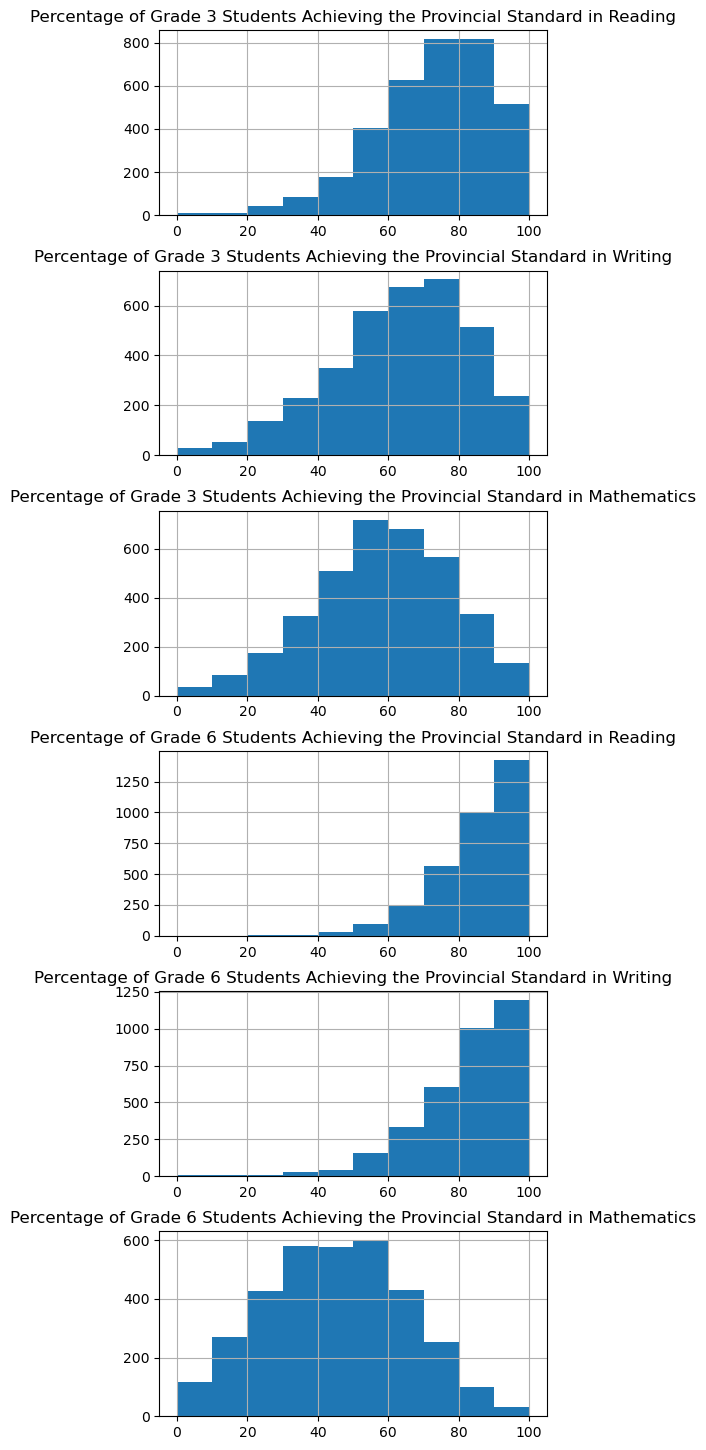

In [45]:
schools[[
    "Percentage of Grade 3 Students Achieving the Provincial Standard in Reading",
    "Percentage of Grade 3 Students Achieving the Provincial Standard in Writing",
    "Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics",
    "Percentage of Grade 6 Students Achieving the Provincial Standard in Reading",
    "Percentage of Grade 6 Students Achieving the Provincial Standard in Writing",
    "Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics",
]].hist(layout=(6,1), figsize=(5,18))

Cela ressemble assez à une répartition normale, bien que tronquée puisque le pourcentage doit se situer entre 0 et 100. Mais c’est intéressant. Il est permis de croire que les valeurs manquantes épouseront cette distribution. Nous pourrions donc effectuer des imputations en remplaçant les valeurs manquantes par des valeurs choisies aléatoirement au sein de cette répartition.

Il nous faut pour cela obtenir la courbe décrivant cette répartition. Nous pouvons le faire en associant aux données une fonction mathématique. Cette fiction mathématique sera la formule utilisée pour une répartition normale car force est de constater que c’est à quoi ressemblent les données. Nous utiliserons NumPy pour obtenir les données de ces histogrammes.

La fonction `np.histogram` génère les limites plutôt que les véritables coordonnées « x ».  Nous devons donc ignorer la dernière entrée et déplacer le tout vers la droite par un demi-intervalle. Nous obtenons alors une distribution de « x » et de « y » de même taille, essentielle pour l’ajustement et le traçage. Une fois le traçage complété, les données obtenues ressembleront en tous points aux histogrammes ci-dessus.

In [46]:
yhist, xhist = np.histogram(schools["Percentage of Grade 6 Students Achieving the Provincial Standard in Reading"].dropna(), bins=20)
xhist=xhist.copy()
xhist.resize(len(xhist)-1)
xhist = xhist + (xhist[1] - xhist[0]) / 2

Nous pouvons alors y associer une répartition normale, en fonction de trois paramètres, à savoir l’amplitude, la moyenne (mu) et l’écart-type (sigma). Le dernier argument relatif à `p0` établit certaines conditions initiales.

In [47]:
res = scipy.optimize.curve_fit(lambda x, A, mu, sigma: A*scipy.stats.norm.pdf(x, loc=mu, scale=sigma), xhist, yhist, p0 = [1000, 60, 20])
amplitude, mu, sigma = res[0]
res[0]

array([4.37026715e+04, 1.06125916e+02, 2.08856249e+01])

Voyons de quoi cela a l’air. Nous tracerons la courbe ajustée sur le même graphique que les histogrammes tracés précédemment. Nous n’utiliserons que celui associé au « Percentage of Grade 6 Students Achieving the Provincial Standard in Reading ». Nous avons choisi la couleur orange pour l’histogramme afin de mieux voir la courbe ajustée. 

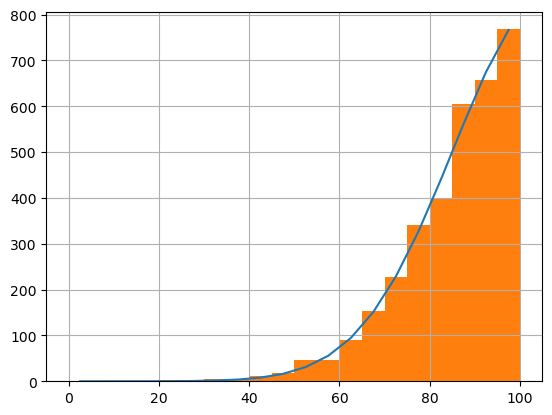

In [48]:
fig, ax = plt.subplots(1, 1)
ax.plot(xhist, amplitude*scipy.stats.norm.pdf(xhist, loc=mu, scale=sigma))
schools["Percentage of Grade 6 Students Achieving the Provincial Standard in Reading"].hist(bins=20)
plt.show()

Pas mal! Utilisons maintenant cette répartition pour générer des valeurs aléatoires et combler os valeurs manquantes. Nous utiliserons `trucnnorm`, une version tronquée pour nous assurer que les chiffres se situent entre 0 et 100. En termes d’argument de limites, la fonction `bounds` repose sur des écarts-types. Nous devons donc faire des calculs!

In [49]:
missingdatafiller = pd.DataFrame(scipy.stats.truncnorm((0 - mu) / sigma, (100 - mu) / sigma, loc = res[0][1], scale=res[0][2]).rvs(len(schools)), columns=["Percentage of Grade 6 Students Achieving the Provincial Standard in Reading"])
schools = schools.fillna(missingdatafiller)

In [50]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4904 entries, 0 to 4903
Data columns (total 19 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   School Type                                                                       4904 non-null   object 
 1   School Level                                                                      4904 non-null   object 
 2   School Language                                                                   4904 non-null   object 
 3   Grade Range                                                                       4904 non-null   object 
 4   Enrolment                                                                         4677 non-null   float64
 5   Percentage of Students Whose First Language Is Not English                        4677 non-null   float64
 6   

Excellent ! La colonne « Percentage of Grade 6 Students Achieving the Provincial Standard in Reading » est pleine. Occupons-nous maintenant des cinq autres colonnes pour lesquelles nous avons tracé les histogrammes précédemment.

In [51]:
for badcol in [
    "Percentage of Grade 3 Students Achieving the Provincial Standard in Reading",
    "Percentage of Grade 3 Students Achieving the Provincial Standard in Writing",
    "Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics",
    "Percentage of Grade 6 Students Achieving the Provincial Standard in Writing",
    "Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics",
]:
    yhist, xhist = np.histogram(schools[badcol].dropna(), bins=20)
    xhist=xhist.copy()
    xhist.resize(len(xhist)-1)
    xhist = xhist + (xhist[1] - xhist[0]) / 2

    res = scipy.optimize.curve_fit(lambda x, A, mu, sigma: A*scipy.stats.norm.pdf(x, loc=mu, scale=sigma), xhist, yhist, p0 = [1000, 60, 20])
    amplitude, mu, sigma = res[0]

    missingdatafiller[badcol] = scipy.stats.truncnorm((0 - mu) / sigma, (100 - mu) / sigma, loc = res[0][1], scale=res[0][2]).rvs(len(schools))
schools = schools.fillna(missingdatafiller)

In [52]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4904 entries, 0 to 4903
Data columns (total 19 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   School Type                                                                       4904 non-null   object 
 1   School Level                                                                      4904 non-null   object 
 2   School Language                                                                   4904 non-null   object 
 3   Grade Range                                                                       4904 non-null   object 
 4   Enrolment                                                                         4677 non-null   float64
 5   Percentage of Students Whose First Language Is Not English                        4677 non-null   float64
 6   

Parfait ! Nous disposons maintenant d’un bon volume de données. Comme les autres colonnes ne comportent que très peu de données manquantes, nous pouvons simplement laisser tomber ces valeurs manquantes.

In [53]:
schools = schools.dropna()
schools

,School Type,School Level,School Language,Grade Range,Enrolment,Percentage of Students Whose First Language Is Not English,Percentage of Students Whose First Language Is Not French,Percentage of Students Who Are New to Canada from a Non-English Speaking Country,Percentage of Students Who Are New to Canada from a Non-French Speaking Country,Percentage of Students Receiving Special Education Services,Percentage of Students Identified as Gifted,Percentage of Grade 3 Students Achieving the Provincial Standard in Reading,Percentage of Grade 3 Students Achieving the Provincial Standard in Writing,Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics,Percentage of Grade 6 Students Achieving the Provincial Standard in Reading,Percentage of Grade 6 Students Achieving the Provincial Standard in Writing,Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics,Percentage of School-Aged Children Who Live in Low-Income Households,"Percentage of Students Whose Parents Have No Degree, Diploma or Certificate"
0,Public,Secondary,English,9-12,190.0,0.0,100.0,0.0,0.0,30.0,0.0,50.257856,63.833014,49.726398,48.519861,98.89290,47.421377,20.0,5.0
1,Public,Elementary,English,JK-8,260.0,0.0,100.0,5.0,0.0,15.0,0.0,89.000000,85.000000,85.000000,73.000000,77.00000,50.000000,10.0,0.0
2,Public,Elementary,English,JK-8,185.0,10.0,100.0,10.0,5.0,30.0,0.0,42.000000,21.000000,26.000000,63.000000,58.00000,32.000000,30.0,5.0
3,Public,Elementary,English,JK-8,170.0,0.0,100.0,0.0,0.0,20.0,0.0,68.000000,47.000000,53.000000,75.000000,75.00000,45.000000,20.0,5.0
4,Public,Elementary,English,JK-8,465.0,10.0,95.0,0.0,0.0,5.0,0.0,97.397113,68.559676,23.000000,85.000000,88.00000,59.000000,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,Public,Elementary,English,JK-8,645.0,72.0,99.0,14.0,15.0,6.0,0.0,77.000000,77.000000,76.000000,89.000000,94.00000,74.000000,17.0,4.0
4900,Public,Secondary,English,9-12,495.0,50.0,100.0,10.0,10.0,20.0,0.0,89.800042,95.546194,22.211423,94.016217,88.06981,18.542068,10.0,10.0
4901,Public,Elementary,English,JK-8,515.0,52.0,100.0,8.0,8.0,7.0,0.0,61.000000,65.000000,50.000000,74.000000,70.00000,35.000000,14.0,7.0
4902,Public,Elementary,English,1-8,245.0,50.0,100.0,0.0,0.0,0.0,0.0,92.688042,80.266271,58.545582,93.000000,96.00000,80.000000,20.0,0.0


Toutefois, certaines colonnes comportent encore des valeurs textes. Nous pouvons intervenir comme nous l’avons fait dans les sections précédentes, c.-à-d. prendre ces valeurs textes et créer des colonnes fictives, une colonne par texte potentiel.

In [54]:
dummies = schools["School Type"].apply(pd.Series).stack().str.get_dummies().groupby(level=0).sum().add_prefix('schooltype_')
schools = schools.join(dummies)
dummies = schools["School Level"].apply(pd.Series).stack().str.get_dummies().groupby(level=0).sum().add_prefix('schoollevel_')
schools = schools.join(dummies)
dummies = schools["School Language"].apply(pd.Series).stack().str.get_dummies().groupby(level=0).sum().add_prefix('schoollanguage_')
schools = schools.join(dummies)
dummies = schools["Grade Range"].apply(pd.Series).stack().str.get_dummies().groupby(level=0).sum().add_prefix('graderange_')
schools = schools.join(dummies)

Nous n’avons plus besoin des colonnes utilisées pour générer les colonnes fictives. Nous pouvons donc les laisser tomber.

In [55]:
schools = schools.drop(["School Type", "School Level", "School Language", "Grade Range"], axis=1)

Nos données sont maintenant utilisables. Enfin, nous l’espérons!

Nous pouvons donc commencer l’entrainement afin de prédire le pourcentage de parents sans éducation formelle, contexte potentiellement lié aux résultats de leurs enfants.

In [56]:
X = schools.drop("Percentage of Students Whose Parents Have No Degree, Diploma or Certificate", axis=1)
y = schools["Percentage of Students Whose Parents Have No Degree, Diploma or Certificate"]

# Répartir les données en jeux de données d’entrainement et d’essais
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un classificateur bayésien naïf de type gaussien
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Faire des prédictions pour le jeu de données d’essais
y_pred = gnb.predict(X_test)

# Évaluer la performance du classificateur
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.03205128205128205


C’est un degré d’exactitude extrêmement faible. Le problème est que nous essayons d’établir le degré d’exactitude avec trop de précision. La valeur de « 20 % » est perçue comme fausse si la valeur actuelle est en fait de « 21 % ». Cela semble plutôt sévère. Tâchons alors de prédire des intervalles plutôt que des valeurs exactes, c.-à-d. prédire des valeurs qui se situent dans un intervalle donné. Dans ce cas-ci, nous créerons 20 segments pour prédire si le « pourcentage d’étudiants dont les parents n’ont pas de diplôme ou de certificat » se situe entre 0 et 4,  5 et 9, 10 et 14, etc. 

In [57]:
X = schools.drop("Percentage of Students Whose Parents Have No Degree, Diploma or Certificate", axis=1)
# y utilise maintenant np.floor / 20 crée 20 compartiments.
y = np.floor(schools["Percentage of Students Whose Parents Have No Degree, Diploma or Certificate"] / 20)

# Répartir les données en jeux de données d’entrainement et d’essais
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un classificateur bayésien naïf de type gaussien
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Faire des prédictions pour le jeu de données d’essais
y_pred = gnb.predict(X_test)

# Évaluer la performance du classificateur
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2222222222222222


Le degré d’exactitude est maintenant de 22 %, ce qui n’est pas très bon. Cela est cependant mieux qu’aléatoire puisque 20 segments équivalent à 5 % de chance de deviner le bon segment. Le modèle a donc effectué un certain apprentissage mais cela demeure insuffisant pour en faire un modèle utile.

### 4.1 Les raisons possibles de cet échec
Qu’est-ce qui n’a pas fonctionné ? Soit le niveau de scolarité des parents n’a pas vraiment d’incidence, soit le modèle que nous voulions appliquer n’était pas le meilleur choix. Il est aussi possible que nos imputations reposent sur de fausses prémisses.

Si le classificateur bayésien naïf fonctionne admirablement avec des caractéristiques qui ne sont pas véritablement indépendantes, il y a une certaine limite à son utilisation. Les données couvrent un vaste éventail de sujets et de niveaux scolaires. Il est probable qu’ils soient tous fortement corrélés. De fait, un établissement scolaire dans lequel des élèves de 6e année obtiennent de bons résultats en lecture comptent fort probablement des élèves qui performent bien en rédaction et en mathématiques, incluant par exemple des élèves de 9e année.

Nous pouvons constater en examinant la matrice de corrélation, qu’il y a définitivement ici de fortes corrélations. 

<Axes: >

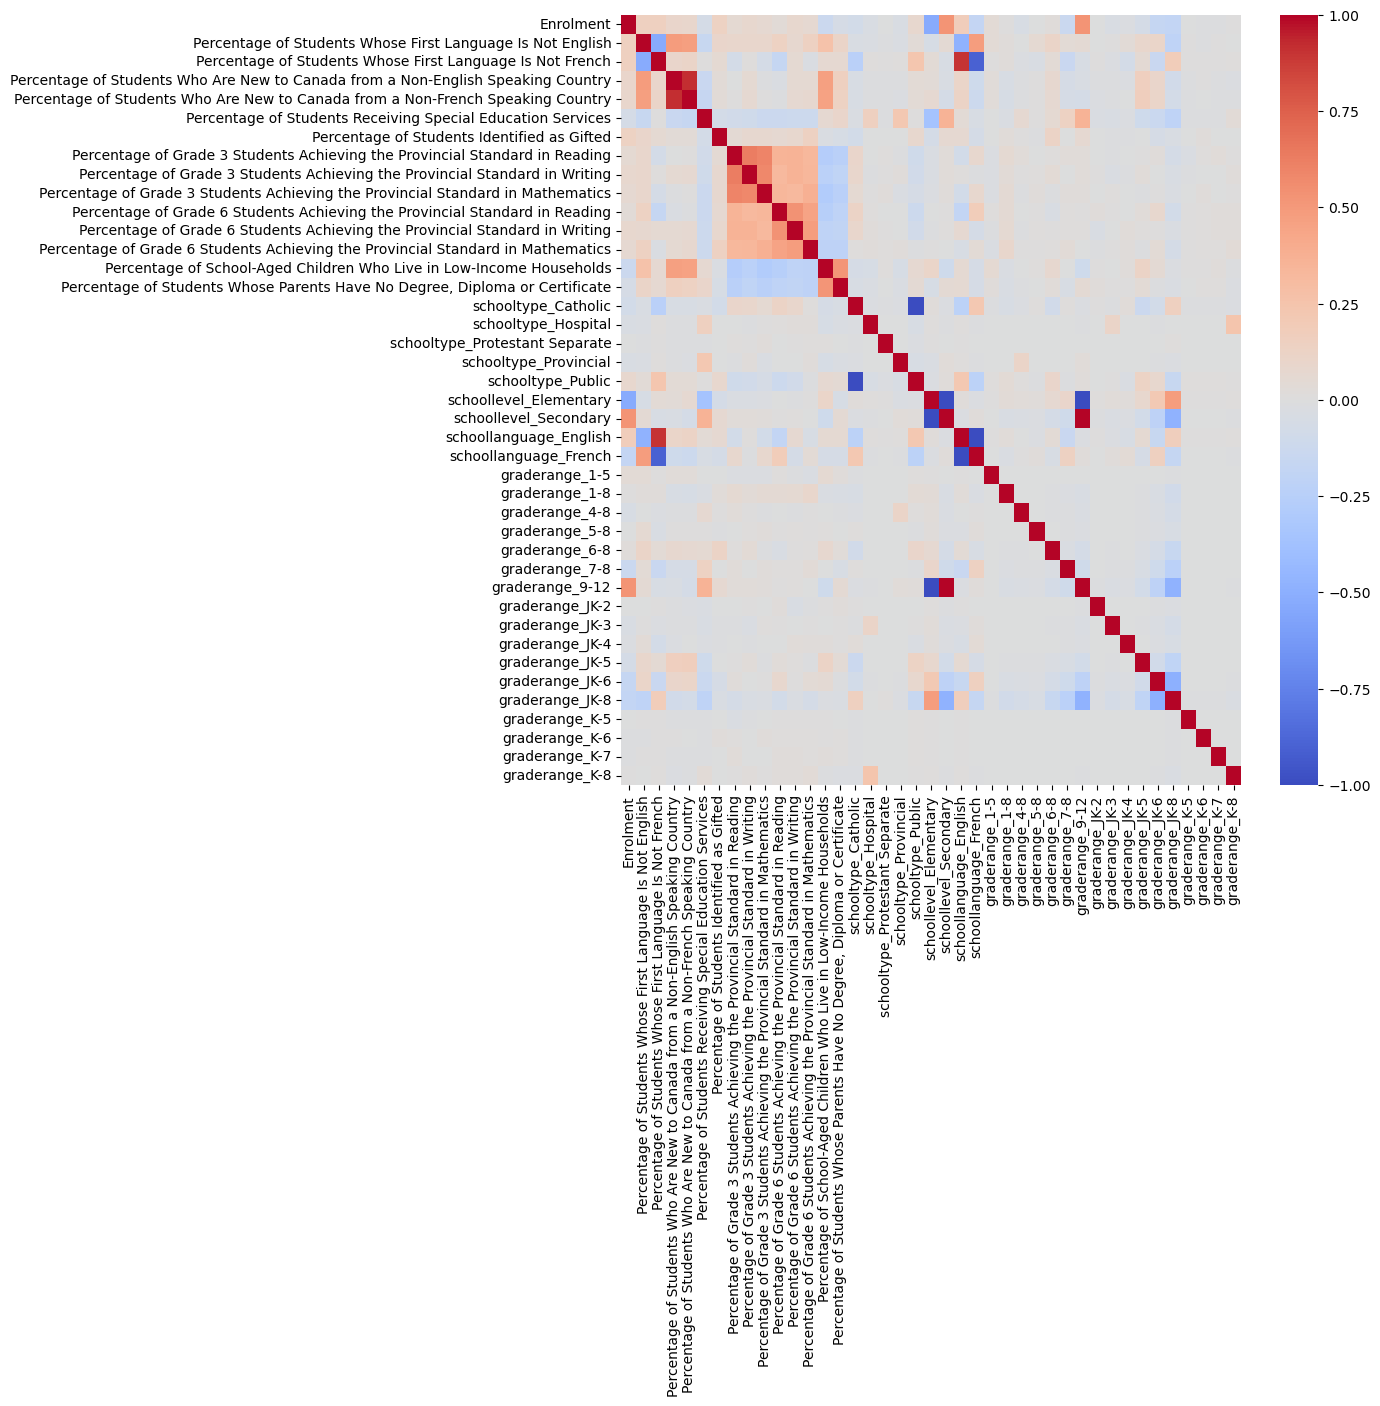

In [58]:
plt.subplots(figsize=(10, 10)) # Élargir le nombre pour que toutes les catégories soient présentes
sns.heatmap(schools.corr(), cmap="coolwarm")

Dans la matrice ci-dessus, les carrés entièrement en rouge correspondent à une corrélation de 1 pour 1 entre ces deux colonnes. C’est-à-dire qu’une valeur haute dans une se traduira par une valeur haute dans l’autre. Les carrés tout en bleu sont aussi fortement interreliés, mais en sens opposé. Des valeurs hautes dans l’une se traduiront par des valeurs basses dans l’autre. Elles demeurent néanmoins corrélées. Elles ne sont pas indépendantes.

Vous noterez que les colonnes « achieving provincial standards (respecter les normes provinciales) » sont toutes fortement corrélées. Il y a aussi une forte corrélation inversée entre le français parlé à l’école et l’anglais parlé à l’école. 

Toutes ces fortes corrélations contredisent l’hypothèse voulant que toutes les colonnes soient indépendantes. Peut-être pourrions-nous accroître la précision du modèle en supprimant les colonnes corrélées. Libre à vous d’essayer. Mais il se peut aussi qu’il n’y ait pas de relation suffisamment forte entre les colonnes de données d’entrée et la colonne du « pourcentage d’étudiants dont les parents n’ont pas de diplôme ou de certificat », celle que nous tentons de prédire.

# Conclusion

Nous avons appris dans ce tutoriel qu’il est possible d’utiliser le classificateur bayésien naïf pour déterminer si des messages SMS sont ou non des pourriels. Nous avons aussi pu l’utiliser pour déterminer à quel genre un livre appartient. Nous avons constaté que le classificateur bayésien naïf est particulièrement performant en présence de nombreuses colonnes de caractéristiques pouvant être utilisées aux fins d’entraînement. Nous disposions de 74169 colonnes pour les messages textes et de 90759 colonnes pour les livres. Les résultats ont été probants en termes de prédiction de pourriels ou du genre d’un livre, atteignant un haut degré d’exactitude.

Nous avons aussi constaté que l’algorithme peut échouer en présence d’une trop forte corrélation entre les colonnes de caractéristiques, ce qui contrevient à la prémisse de base du classificateur bayésien naïf voulant que toutes les caractéristiques soient indépendantes. Mais nous avons aussi découvert une nouvelle technique d’imputation en vertu de laquelle la répartition de valeurs connues permet de distribuer les probabilités pour imputer des valeurs manquantes.  